In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('../data/heart_disease_selected.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [16]:
print(f"Original target values: {sorted(y.unique())}")

Original target values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


In [17]:
y_binary = (y > 0).astype(int)
print(f"Binary target values: {sorted(y_binary.unique())}")
print(f"Distribution: {y_binary.value_counts().sort_index()}")

Binary target values: [np.int64(0), np.int64(1)]
Distribution: num
0    160
1    137
Name: count, dtype: int64


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

In [19]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}


 Training Logistic Regression
Logistic Regression:
   Accuracy: 0.850
   AUC: 0.948

 Training Decision Tree
Decision Tree:
   Accuracy: 0.767
   AUC: 0.761

 Training Random Forest
Random Forest:
   Accuracy: 0.867
   AUC: 0.939

 Training SVM
SVM:
   Accuracy: 0.833
   AUC: 0.944


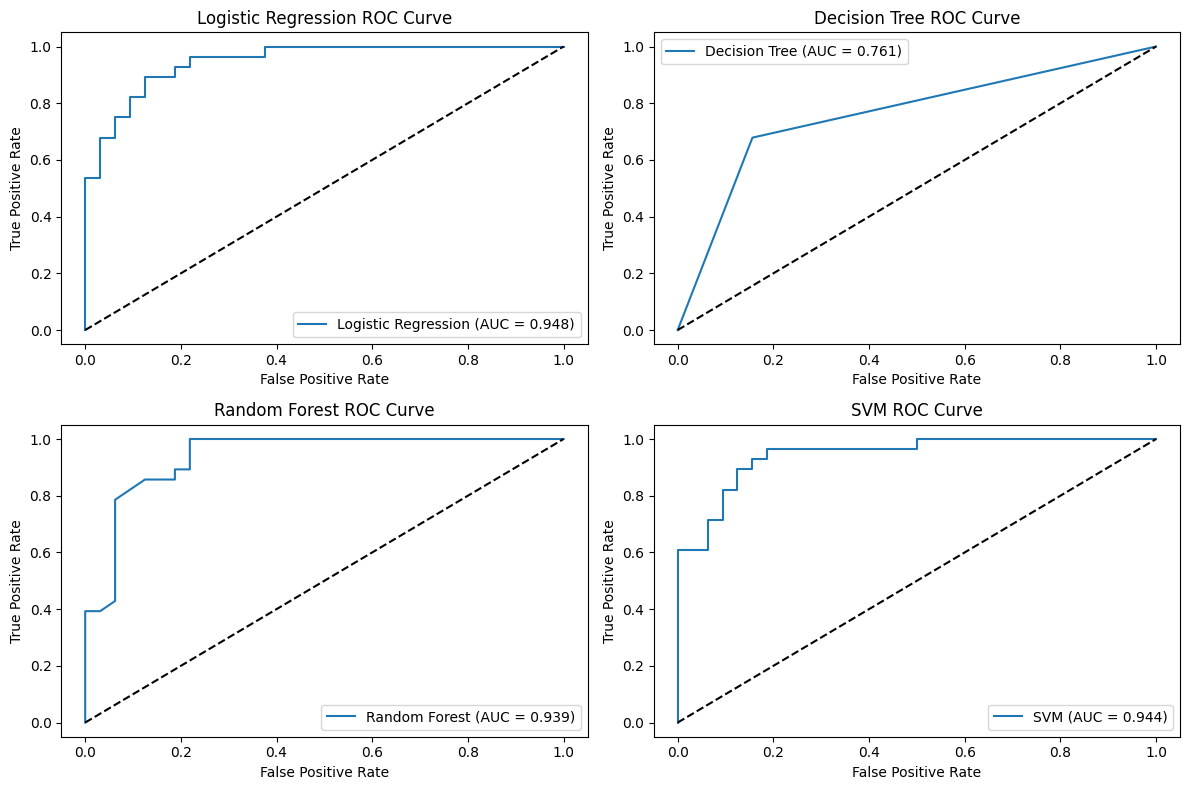

In [23]:
results = {}
plt.figure(figsize=(12, 8))

for i, (name, model) in enumerate(models.items(), 1):
    print(f"\n Training {name}")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'accuracy': accuracy,
        'auc': auc,
        'model': model
    }
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.subplot(2, 2, i)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend()
    print(f"{name}:")
    print(f"   Accuracy: {accuracy:.3f}")
    print(f"   AUC: {auc:.3f}")

plt.tight_layout()
plt.show()

In [24]:
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\n Best model: {best_model_name}")
print(f"   Best accuracy: {results[best_model_name]['accuracy']:.3f}")


 Best model: Random Forest
   Best accuracy: 0.867


In [28]:
import joblib
joblib.dump(best_model, '../models/best_supervised_model.pkl')
print("Best model saved")

Best model saved
